# **Project Leyenda - Deliverable 3**

*Group* : 
|Author|Center|Promo|Mail| 
|---|---|---|---|
|De Jesus Correia Alexandre|Nanterre|FISE INFO A5|alexandre.dejesuscorreia@viacesi.fr|
|Charlut Steven|Nanterre|FISE INFO A5|steven.charlut@viacesi.fr|
|Debraize Killian|Nanterre|FISE INFO A5|killian.debraize@viacesi.fr|
|Raies Youssef|Nanterre|FISE INFO A5|youssef.raies@viacesi.fr|
|Kinya Mwongera Sharon|Nanterre|FISE INFO A5|sharon.kinyamwongera@viaceis.fr|

<br>
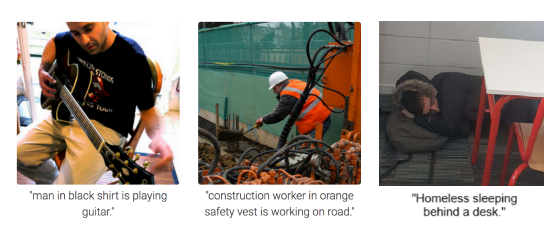

# **Project**

## Context :

**TouNum**, a company specializing in the digitization of documents (text, images, etc.), is looking to expand its services to include 'Machine Learning' tools. Their current focus is on providing solutions for companies with large volumes of documents that need digitization, and they want to offer a service for automatic image categorization. Although TouNum has experience in digitization, they lack expertise in Machine Learning and have turned to CESI Data Science specialists to develop a solution. The proposed solution aims to analyze and describe images (captioning) in an automated way.

In addition to this core goal, there are two main challenges:
- **`Image Cleaning`** : Due to variations in image quality (e.g., blurriness, noise), a cleaning/pre-processing step is required before analyzing the images.
- **`Image Classification`** : Since many of the digitized images are not actual photos but could be documents, diagrams, sketches, or paintings, there needs to be an initial classification step to separate photographs from other types of images.

Luckily, TouNum has a dataset with thousands of categorized and labeled images, which can be used for supervised learning to train the necessary models.

## Objectives :

The project has three main objectives that will lead to a fully automated image analysis and captioning solution:
- **`Binary Classification`** :
Develop a neural network model using TensorFlow and SciKit to classify images into two categories—photos and non-photos (e.g., scanned documents, diagrams, paintings). Ideally, the model should differentiate between photos and other types of images, including drawings or paintings. This module will involve image pre-processing and the use of convolutional neural networks (CNN).
- **`Image Processing`** :
Implement image cleaning and pre-processing techniques using simple convolution filters to enhance the quality of the images before running further analyses. This step ensures that images are clear enough for subsequent classification and captioning tasks.
- **`Image Captioning`** :
Build a captioning model that automatically generates descriptive captions for images. This will require using a combination of convolutional neural networks (CNNs) for image processing and recurrent neural networks (RNNs) to generate textual descriptions. The model will be trained using classical datasets for image captioning.

The final solution should be presented as a reproducible workflow (using Jupyter notebooks), and the prototype must be ready for deployment within five weeks. The workflow should be scalable and adaptable to any image data and include clear documentation to ensure maintenance and further development.

## Tools : 

For our project, we will utilize **`Python`** as our programming language. Python offers libraries, such as NumPy and Pandas, that facilitate efficient data manipulation and analysis, while libraries like Scikit-learn and TensorFlow provide robust tools for implementing machine learning (ML) and deep learning (DL) algorithms.

**`TensorFlow`**, a powerful open-source framework designed for building and deploying ML and DL models, will be our main project tool.
It operates on the concept of 'tensors', which are multi-dimensional arrays that allow for efficient data representation and manipulation. The term 'flow' refers to the way data moves through a computational graph, where operations are represented as nodes and tensors as edges. This architecture enables TensorFlow to optimize the performance of complex mathematical computations, making it ideal for tasks such as neural network training and inference. 

Moreover, TensorFlow provides a rich ecosystem with high-level APIs, such as **`Keras`**, for quick model prototyping, along with lower-level operations for fine-tuning performance.

# **Deliverable 3 : Image Captioning**

This third deliverable focuses on building a neural network for generating captions for images using the **MS COCO dataset**. The model comprises a convolutional neural network (CNN) to encode images into feature representations and a recurrent neural network (RNN) to generate captions based on these features. Images undergo **pre-processing** using a **pre-trained** CNN to extract relevant visual information, while captions are **tokenized** and formatted for input into the RNN.

This document will include the complete architecture schematic, code for implementing the CNN and RNN components, and a summary of the pre-processing steps. It also showcases the model's training performance through visual metrics and example captions, demonstrating its ability to generate accurate and meaningful descriptions for test images. This deliverable finalizes the automated image captioning solution, making it ready for deployment.

# **Building an Image Captioning Model with CNN and RNN**

# Summary

1. [Introduction](#1-introduction)
    - 1.1. [Project Objective](#11-project-objective)
    - 1.2. [Problematic](#12-problematic)

2. [Dataset Exploration](#2-dataset-exploration)
   - 2.1. [Dataset Loading](#21-dataset-loading)
   - 2.2. [Read Annotation file & Data Preprocessing](#22-read-annotation-file--data-preprocessing)
   - 2.3. [Exploring the Resolution Distribution by Image](#23-exploring-the-resolution-distribution-by-image)
   - 2.4. [Exploration of the Distribution of Annotations by Category](#24-exploration-of-the-distribution-of-annotations-by-category)
   - 2.5. [Explore the Distribution of Annotations per Image](#25-explore-the-distribution-of-annotations-per-image)

3. [Preparation of Captions](#3-preparation-of-captions)
    - 3.1. [Dataset reduction](#31-dataset-reduction)
    - 3.2. [Tokenization of Captions](#32-tokenization-of-captions)
4. [Captioning Architecture](#4-captioning-architecture)
    - 4.1. [Injecting Architecture](#41-injecting-architecture)
        - 4.1.1. [Choice of CNN model for feature extraction ](#411-choice-of-cnn-model-for-feature-extraction)
        - 4.1.2. [Transfert Learning](#412-transfert-learning)
            - 4.1.2.A. [Feature Extraction](#412a-feature-extraction)
            - 4.1.2.B. [Fine-Tuning Affinage](#412b-fine-tuning-affinage)
            - 4.1.2.C. [Full Fine-Tuning](#412c-full-fine-tuning)
        - 4.1.3. [Construction of the RNN model](#413-construction-of-the-rnn-model)
            - 4.1.3.A. [Attention Mechanism](#413a-attention-mechanism)
            - 4.1.3.B. [Building the LSTM model](#413b-building-the-lstm-model)
            - 4.1.3.C. [Building the GRU model](#413c-building-the-gru-model)
        - 4.1.4. [Model Training](#414-model-training)

# 1. Introduction

Object detection is a fundamentally important issue in our time, as it has varied applications in areas such as surveillance, autonomous vehicles, and medical image analysis. This problem is generally divided into two main tasks:
- **Classification** : Identifies objects in an image based on their visual characteristics (features).
- **Object Location** : Detect the precise position of these objects using boundary boxes or segmentation masks.

The basic principle is to find, from an image, several objects in order to create a textual description that represents faithfully the visual content of the image. This task is at the heart of today’s computer vision challenges, and several datasets have been created to assess model performance in this area.

Among the most used, we have **PASCAL-VOC** and **MS COCO**.

**PASCAL VOC** is an older and smaller dataset compared to MS COCO. Designed primarily for object detection and segmentation problems, it offers a relatively small set of classes, making it useful for academic research and to quickly test algorithms on a small dataset.

However, for our project we will use the **MS COCO** (Common Objects in Context) dataset. MS COCO is not only larger, but it also introduces more complex annotations such as the segmentation of objects by polygons and generation of image captions. To fully exploit the richness of this dataset, we will use techniques of **learning transfer**. Transfer learning is a common approach in computer vision projects. It allows you to leverage the knowledge that a model has already acquired on a large set of data, and thus improve performance on new datasets with less data and reduced training time.

## 1.1. Project Objective

In this project, our goal is to design a model that can **generate descriptive captions** automatically for images based on the **MS COCO** dataset. To do this, we will use a two-part neural network architecture:
- **A CNN (Convolutional Neural Network)** network, which extracts visual characteristics from images.
- **An RNN (Recurrent Neural Network)** network, which takes these visual characteristics as input and generates sequential text descriptions (captions) for the images.

The **CNN** network is responsible for encoding images, converting them into a compact representation. This representation is then used by the **RNN** network to produce descriptive natural language captions. The NCR used in this project will be a **pre-trained*** model, such as **ResNet***, **VGG**, or **Inception**, initially trained on MS COCO for object recognition. This template will then be adjusted to meet the requirements of legend generation.

## 1.2. Problematic

The main challenge of this project is to develop a model that can generate consistent and accurate **descriptions** for complex images, where multiple objects interact. This includes not only object detection, but also understanding the context and relationships between these objects, while producing a natural language phrase that captures this information. It is also essential to be able to **automatically** assess the quality of generated captions using metrics like **BLUE**.

# 2. Dataset Exploration

In [75]:
# Import libraries
from pycocotools.coco import COCO
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import numpy as np
import os
import time
import json
from tqdm import tqdm
from PIL import Image

## 2.1. Dataset Loading

In [137]:
# Set the base directory
base_dir = os.getcwd()
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Annotations file path
annotation_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# Path to the folder containing the images to be annotated
image_folder = os.path.join(dataset_dir, 'train2014/')
PATH = image_folder

# Display of paths
print("Train images folder :", image_folder)
print("Train annotations File :", annotation_file)

Dossier des images d'entraînement: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\train2014/
Fichier des annotations d'entraînement: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\annotations/captions_train2014.json


## 2.2. Read Annotation file & Data Preprocessing

In [138]:
# Read annotation file
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# Reading Annotations
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    caption = val['caption']
    image_path = os.path.join(PATH, f"COCO_train2014_{val['image_id']:012d}.jpg")
    image_path_to_caption[image_path].append(caption)

# Check the content of image_path_to_caption
print(f"Number of images with annotations : {len(image_path_to_caption)}")

Nombre d'images avec annotations: 82783


In [139]:
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [85]:
caption_lengths = [len(cap.split()) for captions in image_path_to_caption.values() for cap in captions]
mean_caption_length = sum(caption_lengths) / len(caption_lengths)

print(f"Total number of images:{len(train_image_paths)}")
print(f"Average length of captions : {mean_caption_length:.2f} words")

Nombre total d'images : 6000
Longueur moyenne des légendes : 10.46 mots


So there is an average of 10 words to describe a picture.

In [140]:
# Calculate the number of captions per image
image_ids = coco.getImgIds()
captions_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Statistics
max_captions = max(captions_per_image)
min_captions = min(captions_per_image)
mean_captions = sum(captions_per_image) / len(captions_per_image)

print(f"Captions per image - Max : {max_captions}, Min : {min_captions}, Mean : {mean_captions}")

Légendes par image - Max : 7, Min : 5, Moyenne : 5.0023917954169335


Here, we have the number of captions associated with each image.

## 2.3. Exploring the Resolution Distribution by Image

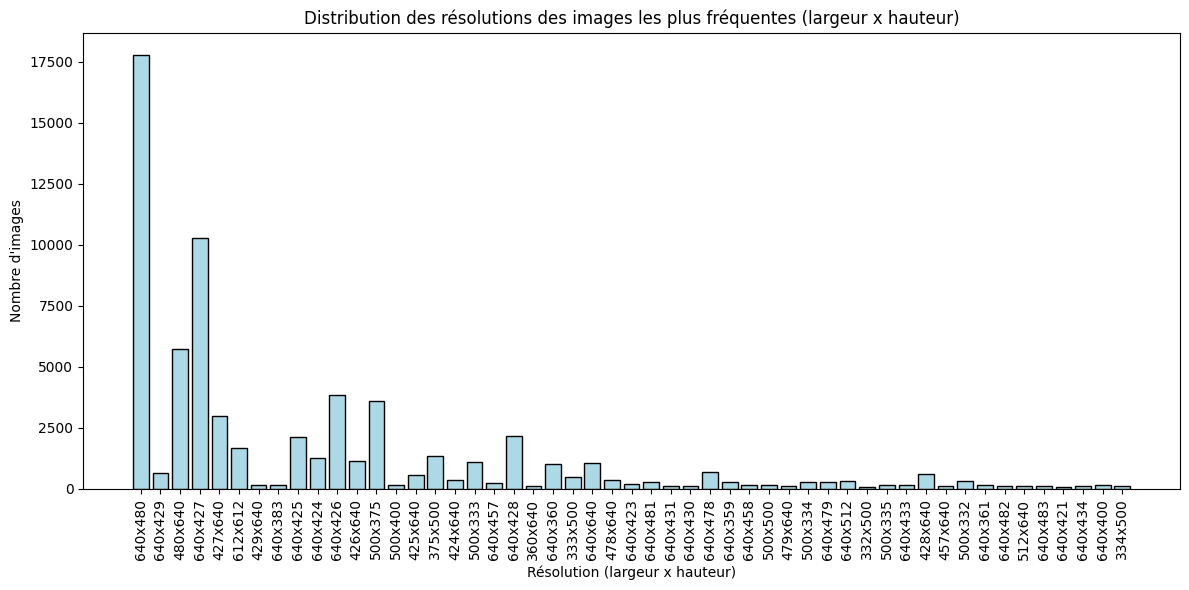

In [141]:
from collections import Counter
import matplotlib.pyplot as plt

# Load all images with the COCO object
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extract widths and heights
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

# Create a list of tuples (width, height)
dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Count the number of images for each single resolution
dimension_counts = Counter(dimensions)

# Filter the most common dimensions (at least 100 occurrences)
common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

# Extract resolutions and their frequency
resolutions, counts = zip(*common_dimensions.items())

# Generate labels for resolutions in the form "width x height"
resolution_labels = [f"{width}x{height}" for width, height in resolutions]

# View the most common resolutions
plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of most frequent image resolutions (width x height)')
plt.xlabel('Resolution (width x height)')
plt.ylabel('Number of images')

# Rotation of labels for better readability
plt.xticks(rotation=90)

# Show the graph with adjustment
plt.tight_layout()
plt.show()

The majority of images in the MS COCO dataset have relatively homogeneous resolutions, with a high concentration around resolutions such as 640x480 and 480x640. This means that we can consider resizing all images to a common resolution (like 640x480), without losing too much detail in the majority of images. 

## 2.4. Exploration of the Distribution of Annotations by Category

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


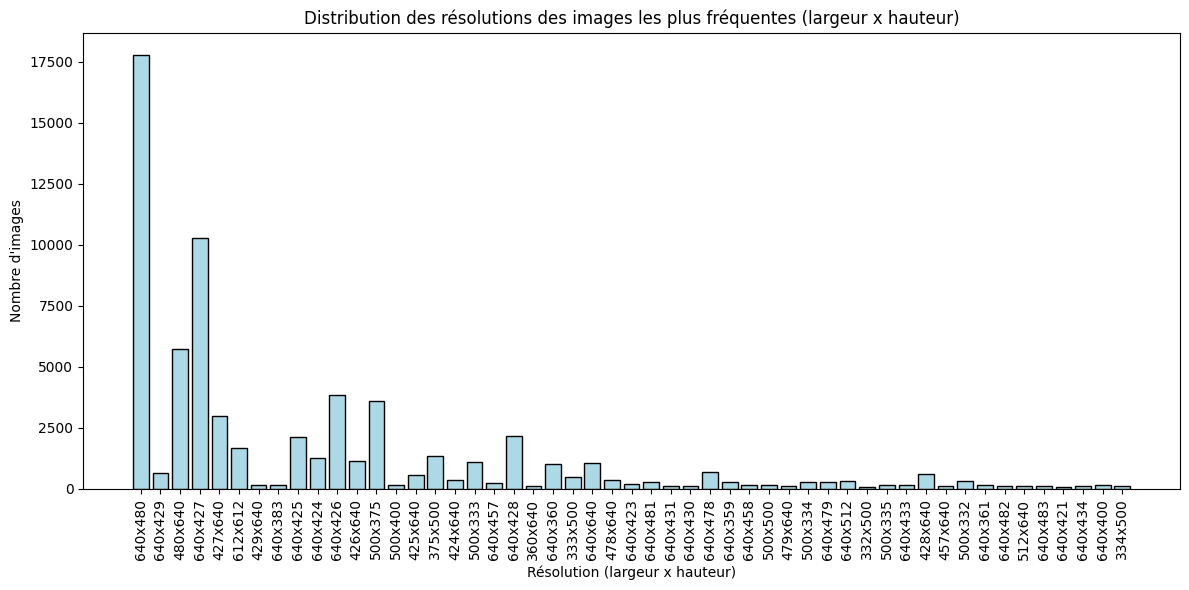

In [142]:
from collections import Counter
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Initialize COCO object with caption annotation file
annFile = os.path.join(dataset_dir, 'annotations/captions_train2014.json')
coco = COCO(annFile)

# Retrieve image IDs and load metadata
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extract image widths and heights
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

# Create a list of tuples (width, height)
dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Count the number of images for each single resolution
dimension_counts = Counter(dimensions)

# Filter the most frequent dimensions (at least 100 occurrences)
common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

# Extract resolutions and their frequency
resolutions, counts = zip(*common_dimensions.items())

# Generate labels for resolutions in the form "width x height"
resolution_labels = [f"{width}x{height}" for width, height in resolutions]

# View the most common resolutions
plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of the most common image resolutions (width x height)')
plt.xlabel('Resolution (width x height)')
plt.ylabel('Number of images')

# Rotation of labels for better readability
plt.xticks(rotation=90)

# Show the graph with adjustment
plt.tight_layout()
plt.show()


There is a **large number of annotations for the category 'person'**, which indicates an **imbalance** between classes. This imbalance can affect the training of the model because it may favour over-represented categories such as 'person', to the detriment of other less common categories.

## 2.5. Explore the Distribution of Annotations per Image

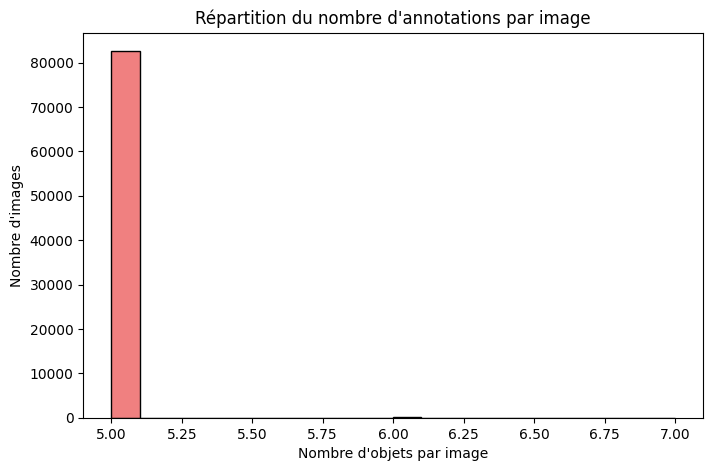

Nombre moyen d'objets par image : 5.00
Nombre maximal d'objets dans une image : 7


In [143]:
# Calculate the number of annotations per image
image_ids = coco.getImgIds() 
annotations_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(annotations_per_image, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of the number of annotations per image')
plt.xlabel('Number of objects per image')
plt.ylabel('Number of images')
plt.show()

# Show some statistics
print(f"Average number of objects per image : {sum(annotations_per_image) / len(annotations_per_image):.2f}")
print(f"Maximum number of objects in an image : {max(annotations_per_image)}")

- On average, each image contains about 7.31 objects. This means that the images in this dataset are relatively complex, with several objects to be detected in each image.

- A large proportion of images contain less than 10 objects. This may be easier to process for object detection models, but it also means that there are a minority of images that are much more complex.

- The maximum number of annotated objects in an image is 93, which shows that some images in the dataset are extremely complex. These images are rare but can be difficult cases for an object detection model.

# 3. Preparation of Captions

Before using the learning transfer methods to extract the characteristics of the images, we must prepare the associated captions. This includes **`tokenization`** of captions and their transformation into numerical sequences, which will be used to train the LSTM model.

Tokenization is a process in *Natural Language Processing* (NLP) where a text is divided into smaller, manageable units or "**tokens**". These tokens can be words, subwords, or even individual characters, depending on the level of tokenization used. The goal of tokenization is to break down the raw text data into pieces that a ML model can more easily understand and process.

Tokenization is an essential step  because it transforms the text from its raw form into a format that can be numerically represented and processed by our model. This enables models to understand the structure and meaning of the text more effectively.

## 3.1. Dataset Reduction

In [144]:
train_image_paths = list(image_path_to_caption.keys())[:5000]
print(f"Number of images selected for training: {len(train_image_paths)}")

Nombre d'images sélectionnées pour l'entraînement : 2000


In [145]:
# --- Collection of captions and associated images ---
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

# Add start and end tokens to captions
train_captions = ['start ' + caption + ' end' for caption in train_captions]

## 3.2. Tokenization of Captions

In [146]:
top_k = 5000  # Limits vocabulary to 5000 most common words
custom_filters = '!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n'
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>", filters=custom_filters)
tokenizer.fit_on_texts(train_captions)

# Convert legends to integer sequences and padder them
train_seqs = tokenizer.texts_to_sequences(train_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calculating the maximum length of sequences
def calc_max_length(sequences):
    return max(len(seq) for seq in sequences)

max_length = calc_max_length(train_seqs)
print(f"Maximum sequence length : {max_length}")


Longueur maximale des séquences: 33


In [147]:
# --- Division of data into training and validation ---
img_name_train, img_name_val, cap_train, cap_val = train_test_split(
    img_name_vector, cap_vector, test_size=0.2, random_state=42)

print(f"Number of training samples : {len(img_name_train)}")
print(f"Number of validation samples : {len(img_name_val)}")

Nombre d'échantillons d'entraînement : 8004
Nombre d'échantillons de validation : 2001


# 4. Captioning Architecture

There are several architectures for generating captions from images. We will focus on two main approaches:

- **`Injecting Architecture`**
- **`Merging Architecture`**

## 4.1. Injecting Architecture

In this architecture, the CNN model (pre-trained) extracts visual characteristics from images, which are then injected into an RNN (for example, LSTM) to generate the captions.

**The goal is to combine visual information from a convolutional neural network (CNN) with a recurrent network (RNN) to produce accurate textual descriptions**. This approach allows the model to leverage the visual characteristics extracted by the CNN to guide the generation of words in the legend, integrating this information at different stages of the process.

The first step of the "Injecting" architecture is **to use a `pre-trained CNN` to extract a vector of characteristics representing the essential information of the image**. This vector encapsulates aspects such as objects present, colors and textures, thus obtaining a condensed representation of the image. These visual characteristics are then **`injected into the RNN`**, which is responsible for generating the sequence of words that make up the legend.

There are two main ways to inject these characteristics into the RNN. In the "**Initial Injection**", the image vector is used to initialize the RNN hidden state before starting sequence generation. This means that the network "understands" the image from the beginning and uses this information to predict each word in succession. In the "**Per-Step Injection**", image characteristics are re-injected at each generation stage, influencing the prediction of each word taking into account both the image and the accumulated linguistic context. Both methods allow the model to adapt the legend generation based on visual content, improving the quality and accuracy of generated descriptions.

![image.png](https://miro.medium.com/v2/resize:fit:750/format:webp/1*cDqencLttz0zkWc__4CfFQ.png)

### 4.1.1. Choice of CNN model for feature extraction 

| ***Template**   | **Input Size** | **Number of Parameters** | **Depth** | **Model Size** | **Performance (ImageNet)** | **Benefits**   | **Disadvantages**   |
|--------------------|------------------------|--------------------------|----------------|----------------------|----------------------------|----------------------------------------|------------------------------------------|
| **InceptionV3**   | 299x299   | ~23.8 million   | 48 layers   | ~92 MB   | Top-1: 77.9%   | - Good efficiency for complex tasks<br>- Relatively light | - Specific input size (299x299)<br>- More complex than ResNet for some cases |
| **ResNet50**   | 224x224   | ~25.6 million   | 50 layers   | ~98 MB   | Top-1: 76.2%   | - Very popular for learning transfer<br>- Easy to use<br>- Good balance between depth and performance | - May be too deep for simple tasks |
| **VGG16**   | 224x224   | ~138 million   | 16 layers   | ~528 MB   | Top-1: 71.5%   | - Easy to understand and implement<br>- Widely used in benchmarks | - Very large number of parameters (slow and memory-intensive) |
| **EfficientNet-B0**| 224x224   | ~5.3 million   | 82 layers   | ~29 MB   | Top-1: 77.1%   | - Very efficient in terms of model size and calculation<br>- Good compromise between performance and lightness | - Less used than ResNet or Inception (fewer resources available) |
| **MobileNetV2**   | 224x224   | ~3.5 million   | 53 layers   | ~14 MB   | Top-1: 71.8%   | - Very light<br>- Ideal for mobile or embedded applications | - Performance lower than other models for complex tasks |
| **Xception**   | 299x299   | ~22.9 million   | 71 layers   | ~88 MB   | Top-1: 79.0%   | - Based on Inception, but more effective for some tasks<br>- High performing | - Less used and documented than ResNet or Inception |
| **DenseNet121**   | 224x224   | ~8 million   | 121 layers   | ~33 MB   | Top-1: 74.9%   | - Very compact network<br>- Fewer parameters for good performance | - Complexity due to connection density  (slower to train) |


Learning transfer is a technique that consists in reusing a pre-trained model on a large dataset (like ImageNet) for a new specific task. This helps speed up the learning process and improve performance, especially when you have less data to train a model from zero. The main approaches to learning transfer are :

### 4.1.2. Transfert learning

Learning transfer is a technique that consists in reusing a pre-trained model on a large dataset (like ImageNet) for a new specific task. This helps speed up the learning process and improve performance, especially when you have less data to train a model from zero. The main approaches to learning transfer are :

| **Technical**   | **Description**   | **When to use ?**   | **Benefits**   | **Drawbacks**   |
|-------------------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|-------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Feature Extraction**   | Use a pre-trained model to extract **fixed features** without re-training the model. | When you want to use a pre-trained model without re-training it on your dataset.   | - Fast<br>- Requires little data.   | - Features not always perfectly suited to your dataset if it is very different from the original dataset.   |
| **Fine Tuning (Refining)**   | **Unfreeze** some layers of the pre-trained model and re-train them on your specific dataset. | When you want to partially adapt a pre-trained model to your dataset.   | - Finer adaptation to the dataset<br>- Often improves performance. | - Requires more training time<br>- Risk of overfitting if data is limited.   |
| **Full Fine-Tuning**   | **Unfreeze all layers** of the pre-trained model and re-train them fully on your dataset. | When your dataset is very different from the original dataset of the pre-trained model.   | - Maximum flexibility to adapt to specific dataset.   | - Very long to train<br>- Requires a lot of data to avoid overlearning.   |


In [149]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

### 4.1.2.A. Feature Extraction 

**`Feature extraction`** is a process where relevant information or characteristics (**features**) are extracted from raw data, such as images, to make it easier for algorithms to perform tasks like classification, detection, or captioning. In the context of image processing, feature extraction involves using techniques to identify and quantify important aspects of an image, such as edges, textures, colors, or shapes, and converting them into a numerical representation. This representation can then be used as input for machine learning models, making the data more manageable and interpretable.

![image.png](https://www.researchgate.net/publication/363695026/figure/fig3/AS:11431281085332127@1663720421792/Feature-Extraction-in-Transfer-Learning.png)

Starting with **InceptionV3**, we will extract the model’s features.

In [150]:
features_dir = 'extracted_features/'
os.makedirs(features_dir, exist_ok=True)
image_model.trainable = False  # Freeze layers of the model

new_input = tf.keras.Input(shape=(299, 299, 3))
hidden_layer = image_model(new_input)
image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [299, 299])
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

# Image pre-processing
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

# Image features extraction and saving
for img, path in tqdm(image_dataset, desc="Extraction des features d'image"):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reduce_mean(batch_features, axis=[1, 2])  # Global Average Pooling
    
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        file_name = os.path.basename(path_of_feature)
        save_path = os.path.join(features_dir, file_name + "_extract_features.npy")
        np.save(save_path, bf.numpy())


Extraction des features d'image: 100%|██████████| 125/125 [01:02<00:00,  2.00it/s]


After loading the MS COCO annotations and images, we extracted **visual characteristics** from an image using the pre-trained **InceptionV3*** model.

- The message **"Loading annotations into memory..."** indicates that the dataset annotations have been loaded and indexed, which makes it easier to manipulate the legends and images in the dataset.
  
- Then we extracted the characteristics of an image with InceptionV3. The **dimensions of the extracted characteristics** are **(1, 8, 8, 2048)**:
  - **1** : Corresponds to the batch size (here, 1 image is processed).
  - **8x8** : Size of the feature map generated by the convolutional layers of the model. It represents a spatial summary of the image.
  - **2048** : Number of filters or channels. Each channel captures a particular visual feature (textures, shapes, etc.).

These characteristics will then be used as input into the **LSTM** model to generate legends based on this visual information.

### 4.1.2.B. Fine-Tuning Affinage

**`Fine-tuning`** is a technique where a pre-trained model, which has already learned a large amount of knowledge from a related task or dataset, is adjusted to better perform on a specific new task. Instead of training a model from scratch, which can be time-consuming and require a lot of data, fine-tuning takes an existing model and makes small adjustments to its weights by training it on a new dataset, allowing it to adapt to the specific characteristics of the new task while retaining the general knowledge it learned earlier.

It is often applied to pre-trained models (like CNNs) that were trained on large datasets, such as ImageNet for image recognition or GPT for text generation. During fine-tuning, the model's earlier layers (which capture general features like edges or shapes in images) are typically frozen or adjusted minimally, while the later layers (which capture more task-specific features) are updated based on the new data. This approach is highly efficient because it leverages the broad knowledge of the pre-trained model and only requires a smaller amount of task-specific training data to achieve strong performance.

![image.png](https://www.researchgate.net/profile/Esra-Alhadhrami/publication/326048343/figure/fig1/AS:643818495950849@1530509699224/Transfer-learning-approaches-a-Fine-tuning-b-CNN-as-feature-extractor.png)

In [46]:
# à completer

100%|██████████| 125/125 [00:57<00:00,  2.17it/s]


### 4.1.2.C. Full Fine-Tuning

**`Full Fine-Tuning`** is a process where all the layers of a pre-trained model are adjusted to optimize performance on a new, specific task. Unlike regular fine-tuning, where some layers (usually the earlier ones) are kept frozen to retain their general features, full fine-tuning **updates the weights of the entire model**. This allows the model to adapt more thoroughly to the new dataset or task, making it capable of capturing task-specific features more effectively.

While it offers the advantage of more flexibility and potentially higher performance, it requires more computational resources and a larger amount of labeled training data compared to regular fine-tuning. It also poses a greater risk of overfitting if the new dataset is small, as the model might adapt too closely to the training data without generalizing well to unseen data.

In [47]:
# à completer

100%|██████████| 125/125 [00:57<00:00,  2.18it/s]


### 4.1.3. Construction of the RNN model

RNNs (Recursive Neural Networks) are particularly suitable for modelling sequential data, such as natural language. Unlike traditional neural networks, NRNs can retain past states when processing a sequence, which is essential for understanding context in tasks such as image captions.

In this project, RNNs are used to generate descriptive image captions because they can model the relationships between words in a caption and learn how a word sequence is structured. By combining this with the visual characteristics extracted from images via transfer learning techniques, the model can understand both visual and textual information.

#### **Comparison of existing RNN architectures**

| RNN Architecture | Description | Pros | Cons |
|------------------|-------------|-----------|---------------|
| **Simple RNN**   | The classic recurring network, which processes each element of a sequence one by one while retaining a memory from the previous state. | - Easy to implement. <br>- Fewer parameters than LSTM or GRU. | - **Gradient problem that disappears**, especially on long sequences. <br>- Cannot model long dependencies well. |
| **LSTM (Long Short-Term Memory)** | RNN variant, with memory mechanisms (LSTM cells, input, forget and exit gates) to retain information over long sequences. | - Able to capture **long dependencies**. <br>- Better handles gradient problem that disappears. | - More complex and slower to train due to the high number of parameters. <br>- More memory-intensive. |
| **GRU (Gated Recurrent Unit)** | Simplified variant of the LSTM, with a **doors** mechanism (update door and reset door) to control information flow. | - **Fewer parameters** than LSTM, therefore faster and less expensive to train. <br>- Performance comparable to LSTM on many tasks. | - Less flexible than LSTM to capture complex dependencies. <br>- May be less efficient than LSTM on very long sequences. |
| **Bi-RNN (bidirectional RNN)** | The **Bi-directional RNN** process a sequence in both directions (forward and backward), allowing the network to take into account past and future context. | - Can better capture the overall context of a sequence. | - Doubles the number of calculations. <br>- More complex and time-consuming and memory-intensive. |


![image.png](https://aiml.com/wp-content/uploads/2023/10/rnn-lstm-gru-transformers.png)

### 4.1.3.A. Attention Mechanism

An **`Attention Mechanism`** is a concept in machine learning (ML), particularly in natural language processing (NLP) and computer vision, that **allows models to focus on specific parts of the input data when making predictions**. It simulates the way humans pay selective attention to certain elements while processing information. In the context of machine translation or text generation for example, an attention mechanism helps the model identify which words or phrases in a source sentence are most relevant for generating each word in the target sentence.

The attention mechanism works by assigning different "**weights**" to different parts of the input data. These weights indicate the importance of each input element relative to the current task, allowing the model to prioritize more relevant information while downplaying less relevant parts. In practice, the mechanism calculates attention scores for each element and then combines these scores with the input data to produce a weighted representation that emphasizes the most important features.

![image.png](https://d2l.ai/_images/seq2seq-details-attention.svg)

In [151]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        attention_hidden_layer = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        score = self.V(attention_hidden_layer)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

### 4.1.3.B. Building the LSTM model

**`Long Short-Term Memory (LSTM)`** is a type of RNN architecture designed to process sequential data, such as time series or natural language, while addressing the limitations of traditional RNNs. Standard RNNs struggle with learning long-term dependencies due to the problem of vanishing gradients, where information from earlier time steps gradually diminishes as it passes through the network. LSTMs solve this by incorporating special "memory cells" that can maintain information over long sequences, making them well-suited for tasks that require understanding context over time.

An LSTM unit consists of three main components called **`gates`** : **the input gate, the forget gate, and the output gate**. These gates regulate the flow of information into and out of the memory cell. **The input gate controls how much new information is added to the cell state, the forget gate determines what information should be discarded from the cell, and the output gate decides how much of the cell state should be exposed to the next layer or time step**. By dynamically updating these gates during training, LSTMs can learn which parts of the sequence are important to remember and which can be forgotten.

![image.png](https://media.licdn.com/dms/image/v2/D5612AQH7ywLf6xH_rA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1690356194969?e=2147483647&v=beta&t=S-frcgtTyzrBWZ0K3K_GqK8dZ6OGA5oPtLzIRwRG74M)

In [ ]:
# à completer

### 4.1.3.C. Building the GRU model

A **`Gated Recurrent Unit (GRU)`** is a type of RNN architecture used for processing sequential data, similar to Long Short-Term Memory (LSTM) networks, but with a simpler design. GRUs were introduced to address the vanishing gradient problem in traditional RNNs, which makes it difficult for the network to learn long-term dependencies. GRUs achieve this by using gating mechanisms to control the flow of information, allowing the model to retain important information over time and forget irrelevant data.

The GRU architecture consists of two main gates : **the update gate and the reset gate**. **The update gate determines how much of the past information needs to be carried forward to the future, helping the model retain long-term dependencies. The reset gate controls how much of the previous memory should be forgotten and is used to incorporate new information**. These gates work together to regulate the flow of information through the network, making GRUs more efficient than LSTMs since they use fewer parameters while still effectively capturing temporal dependencies.

![image.png](https://www.researchgate.net/publication/350463426/figure/fig4/AS:1012181290201090@1618334233899/Structure-of-the-gated-recurrent-unit-GRU-recurrent-network.jpg)

In [153]:
# Setting the parameters
embedding_dim = 256
units = 512
vocab_size = top_k + 1  # +1 for <unk> token
feature_dim = 2048      # After Global Average Pooling

In [154]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True)
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        x = self.fc1(output)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.fc2(x)
        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [157]:
# Creation of the decoding template
caption_model = RNN_Decoder(embedding_dim, units, vocab_size)
caption_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
caption_model.summary()

Model: "rnn__decoder_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_28 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bahdanau_attention_18           │ ?                      │   0 (unbuilt) │
│ (BahdanauAttention)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Datasets Preparation

In [158]:
# --- Preparation Datasets  ---
def map_func(img_name, cap):
    img_tensor = np.load(os.path.join(features_dir, os.path.basename(img_name.numpy().decode('utf-8')) + "_extract_features.npy"))
    return img_tensor.astype(np.float32), cap

def tf_map_func(img_name, cap):
    img_tensor, cap = tf.py_function(map_func, [img_name, cap], [tf.float32, tf.int32])
    img_tensor.set_shape((feature_dim,))
    cap.set_shape((max_length,))
    return img_tensor, cap

train_dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
train_dataset = train_dataset.map(tf_map_func, num_parallel_calls=tf.data.AUTOTUNE).shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((img_name_val, cap_val))
val_dataset = val_dataset.map(tf_map_func, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(tf.data.AUTOTUNE)

### 4.1.4. Model Training

In [128]:
# --- Training loop ---
EPOCHS = 20
loss_plot = []

for epoch in range(EPOCHS):
    start = time.time()
    total_loss = 0
    
    for (batch, (img_tensor, target)) in enumerate(tqdm(train_dataset, desc=f"Epoch {epoch+1}/{EPOCHS}")):
        loss = 0
        with tf.GradientTape() as tape:
            hidden = caption_model.reset_state(batch_size=target.shape[0])
            dec_input = tf.expand_dims([tokenizer.word_index['start']] * target.shape[0], 1)
            for i in range(1, target.shape[1]):
                predictions, hidden, _ = caption_model(dec_input, img_tensor, hidden)
                loss += tf.keras.losses.sparse_categorical_crossentropy(target[:, i], predictions, from_logits=True)
                dec_input = tf.expand_dims(target[:, i], 1)

            batch_loss = tf.reduce_mean(loss) / int(target.shape[1])
        
        gradients = tape.gradient(batch_loss, caption_model.trainable_variables)
        caption_model.optimizer.apply_gradients(zip(gradients, caption_model.trainable_variables))
        total_loss += batch_loss

    avg_loss = total_loss / (batch + 1)
    loss_plot.append(avg_loss)
    
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}, Time: {time.time() - start:.2f} sec')


Epoch 1/20: 100%|██████████| 126/126 [04:17<00:00,  2.04s/it]


Epoch 1/20, Loss: 2.0533, Time: 257.46 sec


Epoch 2/20: 100%|██████████| 126/126 [06:54<00:00,  3.29s/it]


Epoch 2/20, Loss: 1.5262, Time: 414.74 sec


Epoch 3/20: 100%|██████████| 126/126 [03:53<00:00,  1.85s/it]


Epoch 3/20, Loss: 1.4504, Time: 233.26 sec


Epoch 4/20: 100%|██████████| 126/126 [04:14<00:00,  2.02s/it]


Epoch 4/20, Loss: 1.3975, Time: 254.14 sec


Epoch 5/20:  61%|██████    | 77/126 [02:24<01:35,  1.95s/it]

In [ ]:
# --- Loss curve visualization ---
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()